## Setup

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img_list = [
    cv2.imread(r'C:\Users\Admin\Desktop\class\lecture2_image_processing\quiz\Q3\pic1.png'),
    cv2.imread(r'C:\Users\Admin\Desktop\class\lecture2_image_processing\quiz\Q3\pic2.png'),
    cv2.imread(r'C:\Users\Admin\Desktop\class\lecture2_image_processing\quiz\Q3\pic3.png'),
    cv2.imread(r'C:\Users\Admin\Desktop\class\lecture2_image_processing\quiz\Q3\pic4.png'),
]

stitcher = cv2.Stitcher_create()
status, img_concat = stitcher.stitch(img_list)

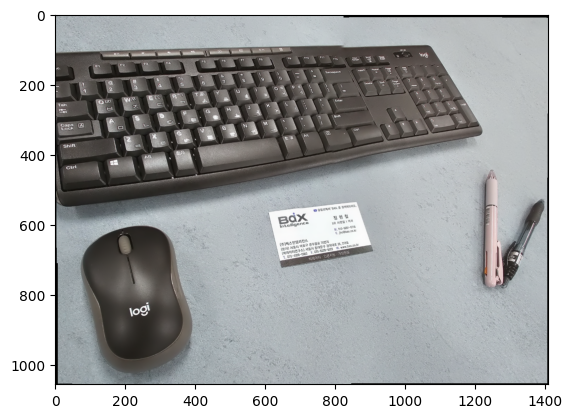

In [3]:
plt.imshow(img_concat); plt.show()

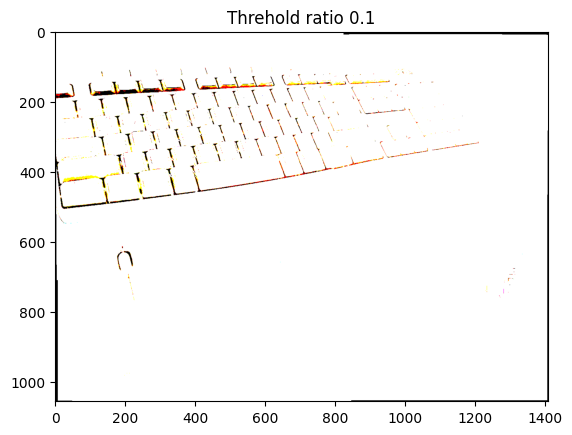

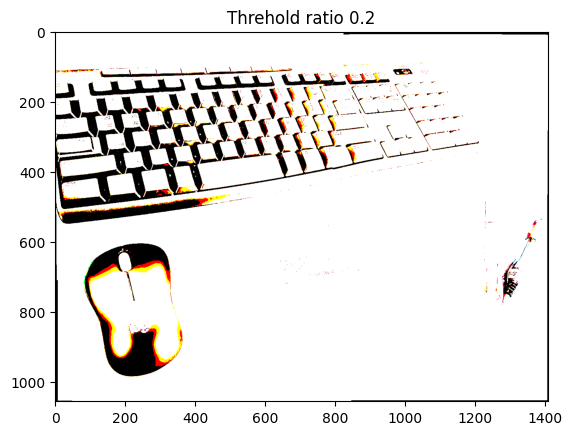

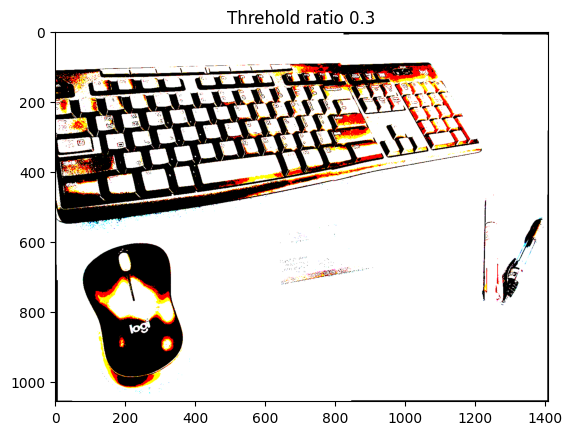

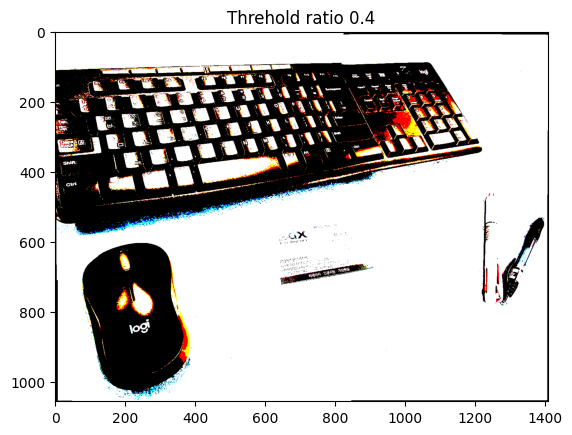

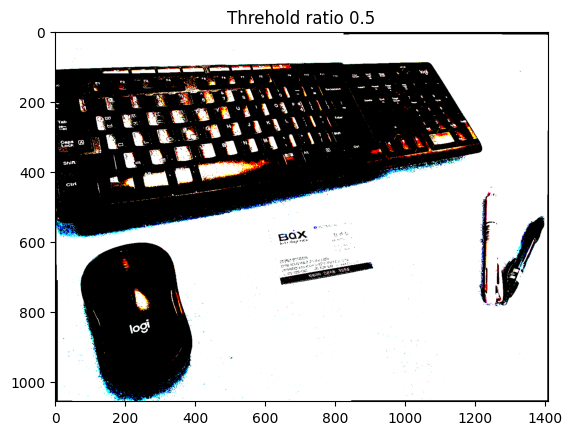

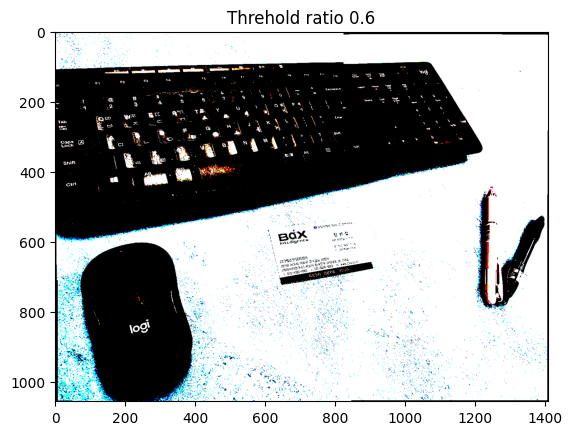

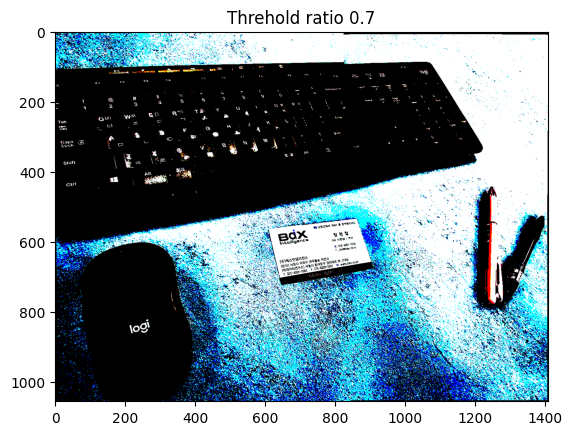

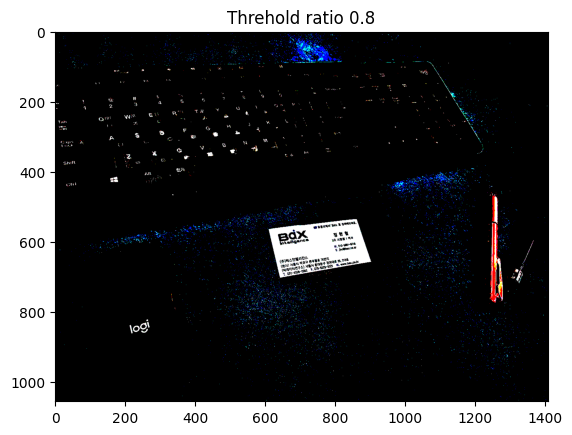

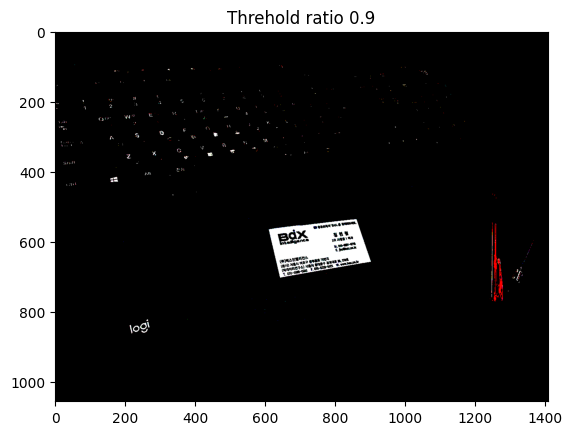

In [4]:
threshold_ratio = np.array(range(1, 10, 1)) / 10
for i in threshold_ratio:
    retval, img_binary = cv2.threshold(img_concat, 255 * i, 255, cv2.THRESH_BINARY)
    plt.imshow(img_binary)
    plt.title(f"Threhold ratio {i}")
    plt.show()

In [5]:
best_threshold_ratio = 0.95
retval, img_binary = cv2.threshold(img_concat, 255 * best_threshold_ratio, 255, cv2.THRESH_BINARY)
img_binary = cv2.cvtColor(img_binary, cv2.COLOR_RGB2GRAY)

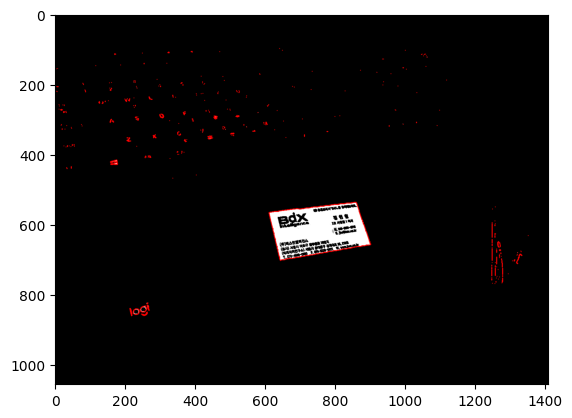

In [6]:
def get_contour_image(img_binary):
    contours, hier = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
    img_bgr = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2BGR)
    idx = 0
    while idx >= 0:
        c = (0, 0, 255)
        cv2.drawContours(img_bgr, contours, idx, c, 2, cv2.LINE_8, hier)
        idx = hier[0, idx, 0]
    return contours, cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

contours, img_contour = get_contour_image(img_binary)
plt.imshow(img_contour); plt.show()

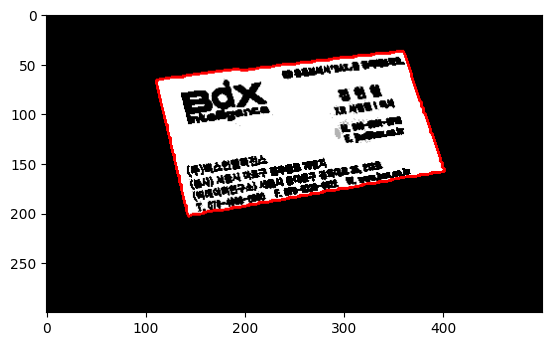

In [7]:
plt.imshow(img_contour[500:800, 500:1000, :]); plt.show()

x axis coordinate : 113 399
y axis coordinate : 39 201


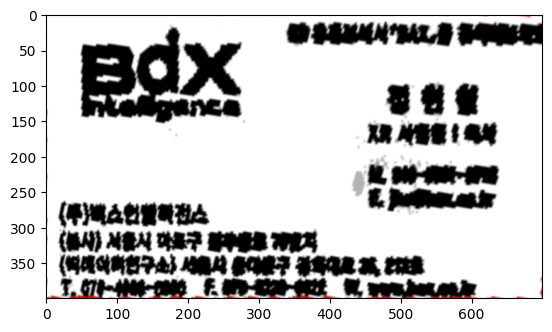

In [8]:

img_capture = img_contour[500:800, 500:1000, :]
(img_h, img_w) = img_capture.shape[:2]

def get_quad_coordinate(img_capture, img_h, img_w):
    match_bar = np.ones((img_h, 1)) * 255
    left_x = np.where((img_capture[:, :, 2] == match_bar).sum(axis=0) > 0)[0][0]
    right_x = img_w - np.where((img_capture[:, :, 2] == match_bar).sum(axis=0)[::-1] > 0)[0][0] -1
    print("x axis coordinate :", left_x, right_x)

    match_bar = np.ones((1, img_w)) * 255
    upper_y = np.where((img_capture[:, :, 2] == match_bar).sum(axis=1) > 0)[0][0]
    lower_y = img_h - np.where((img_capture[:, :, 2] == match_bar).sum(axis=1)[::-1] > 0)[0][0] -1
    print("y axis coordinate :", upper_y, lower_y)

    srcQuad = np.array([
        [left_x, img_capture[:, left_x, 2].argmax()], # west
        [img_capture[upper_y, :, 2].argmax(), upper_y], # north
        [right_x, img_capture[:, right_x, 2].argmax()], # east
        [img_capture[lower_y, :, 2].argmax(), lower_y], # south
    ], dtype="float32")
    dstQuad = np.array([
        [0, 0],
        [img_w-1, 0],
        [img_w-1, img_h-1],
        [0, img_h-1],
    ], dtype="float32")
    return srcQuad, dstQuad

srcQuad, dstQuad = get_quad_coordinate(img_capture, img_h, img_w)
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(img_capture, pers, (img_w, img_h))
dst = cv2.resize(dst, (700, 400))
plt.imshow(dst); plt.show()